In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import cross_val_score, train_test_split

In [170]:
df = pd.read_csv("./data/heart-disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

In [171]:
# Train Test Split Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [172]:
# Cross Validation Score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring="accuracy")
np.mean(scores)

0.828360655737705

0.8988095238095238

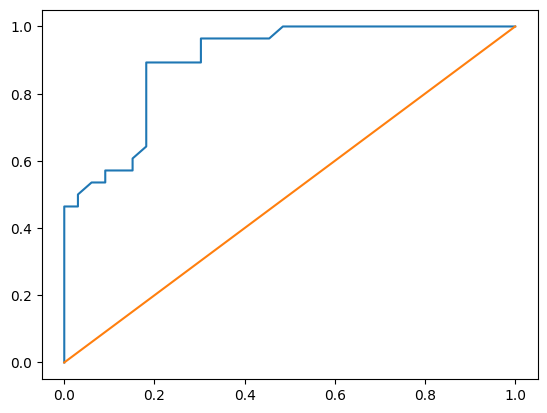

In [173]:
# Area under Receiver Operating Characteristiv Curve (ROC/AUC) => TPR-to-FPR rate
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict_proba = model.predict_proba(X_test)
y_predict_positive = y_predict_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_predict_positive)
score = roc_auc_score(y_test, y_predict_positive)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1])

score

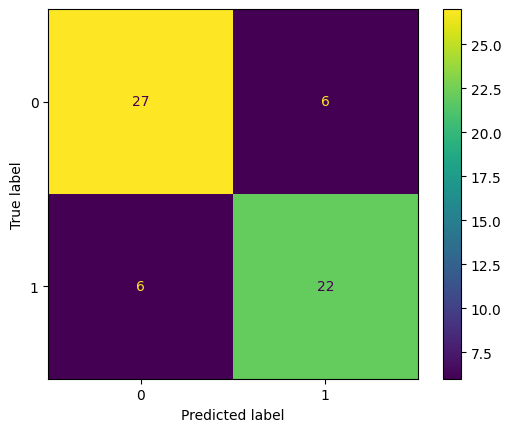

In [174]:
# Confusion Matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_confusion = confusion_matrix(y_test, y_predict)

confusion_matrix_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# sns.heatmap(y_confusion)